In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# to load data
# work on dataset advertising.csv

df=pd.read_csv("advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head()  

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# to remove column permanently from dataframe 

df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# to check null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

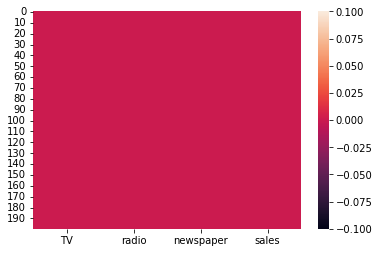

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

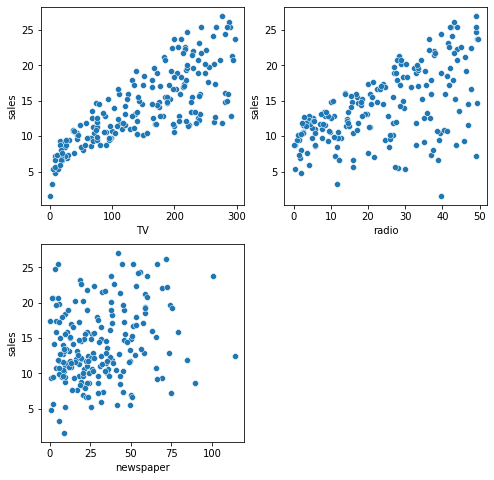

In [9]:
X=['TV', 'radio', 'newspaper']
Y=df['sales']

plt.figure(figsize=(8,8))
for i, col in enumerate(X):   #enumerate():to return 2values from list 
    # 1.index 2.value at index
    plt.subplot(2,2,i+1)  #subplot(rows,columns)
    sns.scatterplot(df[col],Y)   #plt.scatter(X,Y)
plt.show()

In [10]:
X=df[['TV', 'radio', 'newspaper']]
Y=df['sales']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [13]:
#Nice upword growth that means as we investment more on TV the sales is also
#increasing that means +ve correlation means good +ve correlation between
#TV(input) with sales(output)

#see the scatter plot radio with sales : - looks better but lot of data is 
#scattered but scatter data overhere +ve correlation, But correlation is less
#as compared to TV

#the scatter plot newspaper with sales is very bed correlation means no +ve 
#corr and no -ve corr means no
#correlation newspaper with sales because data point are scattered

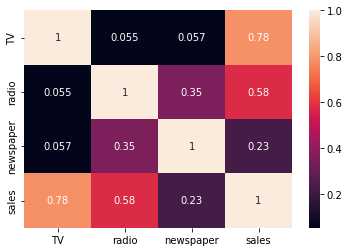

In [14]:
# check correlation between input and output

sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
# correlation values with TV and sales=0.78 , It is very good
# correlation values with radio and sales=0.58 , It is good(ok)
# correlation values with newspaper and sales=0.23 , It is very bad

## performing the model

In [16]:
# perform the linear regression model
# create a model with the help of LinearRegression
# call LinearRegression class

from sklearn.linear_model import LinearRegression

In [17]:
# create the object of LinearRegression class
lr=LinearRegression()

In [18]:
# train the model : use fit() inbuilt method of LinearRegression class
lr.fit(X_train,Y_train)

LinearRegression()

In [19]:
# to show slope means coefficient and intercept
print("slope :",lr.coef_)
print("intercept :",lr.intercept_)

slope : [0.04695205 0.17658644 0.00185115]
intercept : 2.9372157346906107


In [20]:
# test the model 
# ML always gives predicted output
Y_pred=lr.predict(X_test)   #Y_pred=m*X_test+b
Y_pred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
# show mean_squared_error
mean_squared_error(Y_test,Y_pred)    #formula=sum of (Y-Y_pred)^2/N 

1.9289249074665737

In [23]:
# R-2 score : formula = (TSS-RSS)/TSS 
# where TSS means total sum of squared, RSS means residual sum of squared
# range of R-2 score is 0 to 1

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(Y_test,Y_pred)

0.9224605706201434

In [26]:
#here input radio and newspaper both are corelated each other value of corr 
#between radio and newspaper =0.35 means multicolinearity situation occurs(greater than 0.1)
#so check corr of both input radio and newspapaer with o/p and remove those 
#input column whose corr value with o/p will be less 
#here newspaper is less correlated with o/p sales as compared to radio with
#sales so remove newspaper from dataset 
#and perform TV and radio with sales

In [27]:
#corr value of radio with sales :  0.58  
#corr value of newspaper with sales : 0.23
#corr value of radio and newspaper(both are input and correlated each other:0.35
#so we decided , remove newspaper because corr of radio with sales>newspaper 
#with sales
#We have input TV and radio and target sales
X=df[["TV","radio"]] #input TV and radio : 2D array
Y=df["sales"] #output which want to predict : always 1 D array

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [29]:
Lr1=LinearRegression()

In [30]:
Lr1.fit(X_train,Y_train)

LinearRegression()

In [31]:
Y_pred1=Lr1.predict(X_test)
Y_pred1

array([21.6786746 , 16.43892004,  7.70903733, 17.92158421, 18.67111499,
       23.74835071, 16.24962798, 13.37657045,  9.12364788, 17.27585015,
       14.40513872,  9.85730919, 17.31402746, 16.61437382, 15.02857874,
       15.42489496, 12.42021473, 17.34892466, 11.09570896, 18.10320281,
        9.38655615, 12.65171582,  8.70947008, 10.49704698, 11.35942404,
       15.03043294,  9.73268033, 19.46660993, 18.26160716, 17.21035792,
       21.60669421, 14.58454377, 16.32136242, 12.3456783 , 19.99853614,
       15.38120487, 14.01613968, 10.05601014, 20.94792024,  7.45626202,
        3.65120693,  7.26465144,  5.99278035, 18.39717578,  8.2996665 ,
       14.13011074, 14.95229617, 20.37261349, 20.60678937, 19.48376432,
       24.08819667, 14.89416249,  6.71850002, 19.74995269, 18.99448081,
       12.52042181, 14.18823598,  6.09331077, 15.39558485,  9.58586241])

In [32]:
print("Slope :",Lr1.coef_)
print("Intercept :",Lr1.intercept_)

Slope : [0.04697554 0.17765046]
Intercept : 2.9647671191401574


In [33]:
mean_squared_error(Y_test,Y_pred1)

1.9147050289721805

In [34]:
r2_score(Y_test,Y_pred1)

0.92303218502568

In [35]:
#Asummptionof Linear regression
#2 Threr sould be Lnear relationship
#3 If occur linear relation  next check relationn is homoskedastick
#not hetrotroskedastik

#find residuals
residual=Y_test-Y_pred1
print(residual)

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: sales, dtype: float64


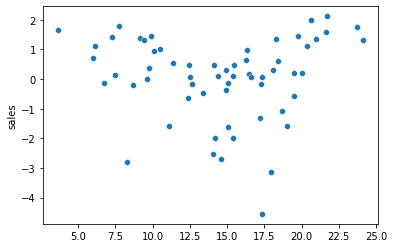

In [36]:
# visualize scatter plt between Y_ped and residual means
# here input x =Y_pred and 
sns.scatterplot(Y_pred1,residual)
plt.show()

In [37]:
# in above scatterplot, This is not a linear relation between Y_pred
# and residules means no relation between x=["TV","radio"] with sales o/p
#means this assumption is not fullfill

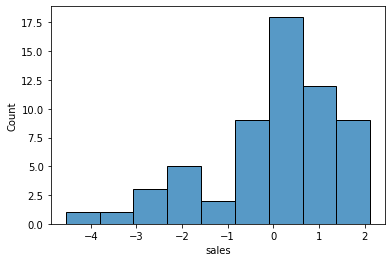

In [38]:
sns.histplot(residual)
plt.show()

In [39]:
residual.skew()

-1.0935181639447333

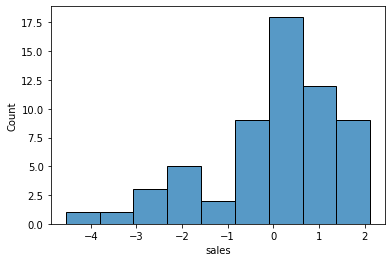

In [40]:

sns.histplot(residual)
plt.show()

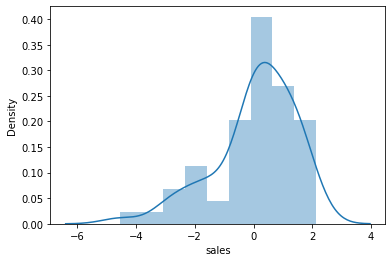

In [41]:
sns.distplot(residual)
plt.show()

In [42]:
# In above distplot curve , -ve skewness found means no normal distributed curve
# found means it is a AS -symmetric curve means this assumption is not fullfill

In [43]:
# here we handled multicolinearity (removed multicolinearity (problem)
# but not working 3 assumption 
# means no relation relationship means here create a curve
# relation should be HOMOSKEDAStik : means datapoints are closely each other
# should not by Heteroskedastic  means should not be scattered
# if linear relationship occurs
# no normal distributed curve

In [44]:
# assumptions fulfill = model perfect

#HERE we handled multicolinearity (removed multicolinearity (problem)
#but not working 3 assumption 
#means no relation relationship means here create a curve
#relation should be HOMOSKEDAStik : means datapoints are closely each other
#should not by Heteroskedastic  means should not be scattered
#if linear relationship occurs
# no normal distributed curve

# so use Polynomial linear Regression

#### polynomial linear equation 

In [45]:
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#increase the degree of input variable=2
#equation Y=m1*TV**2+m2*TV+m3*radio**2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1**2+bx1+cx2**2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV**2+m2*TV**1+m3*radio**2+m4*radio**1+b

In [46]:
# take input variable 
X=df[['TV','radio']]   #input always 2D array
Y=df['sales']

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
# create object 
pf=PolynomialFeatures(3)  #here 3 is degree of input means pass how much degree
#pass how much degree

In [49]:
#fit_transform() : inbuilt method of polynomialfeature class
# we create polynomial of X so we call fit_transform() : inbuilt
# method of polynomial features class

X_poly=pf.fit_transform(X)


In [50]:
# same steps apply of linearregression

# train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [51]:
# create object
lr=LinearRegression()

In [52]:
# train the data , using fit() method
lr.fit(X_train,Y_train)


LinearRegression()

In [53]:
# we testing the model means prediction
Y_pred=lr.predict(X_test)

In [54]:
Y_pred

array([23.84188798, 16.15436166,  9.59311778, 14.86575705, 17.42053977,
       25.47220033, 17.09714001, 12.92302282, 10.3562538 , 16.85479186,
       14.80887029, 10.76989194, 16.94016998, 17.57103614, 12.95422039,
       16.47942682, 13.34770761, 13.26078551,  8.64395867, 18.26807726,
       10.89674657, 12.56988193,  7.62422886, 11.79217251, 12.52303103,
       14.77338601,  9.40797795, 18.96444106, 19.63886835, 15.64685712,
       22.8911917 , 11.7418389 , 17.39782218, 12.09432297, 19.87279431,
       15.37308996, 11.59224156, 11.03779893, 22.48736008,  6.74877459,
        5.30047191,  9.29601801,  6.27325925, 18.92748401,  5.77961914,
       14.90236227, 14.90331875, 21.21181447, 22.26140752, 19.72659892,
       25.96939598, 15.91093763,  6.52342527, 21.46273179, 17.45616876,
       12.50252932, 12.08848058,  6.76655643, 13.17352185,  9.33068357])

In [55]:
print("slope:",lr.coef_)
print("intercept:",lr.intercept_)

slope: [ 0.00000000e+00  9.16483199e-02  2.25347616e-02 -4.65701531e-04
  1.30652795e-03 -1.62567917e-04  8.31531755e-07 -7.44270012e-07
 -1.18928234e-06  9.37589630e-06]
intercept: 4.162147476927448


In [56]:
mean_squared_error(Y_test,Y_pred)

0.14469078648213501

In [57]:
r2_score(Y_test,Y_pred)

0.9941836818131595

In [58]:
residuals=Y_test-Y_pred
print(residuals)

58    -0.041888
40     0.445638
34    -0.093118
102   -0.065757
184    0.179460
198    0.027800
95    -0.197140
4     -0.023023
29     0.143746
168    0.245208
171   -0.308870
18     0.530108
11     0.459830
89    -0.871036
110    0.445780
118   -0.579427
159   -0.447708
35    -0.460786
136    0.856041
59     0.131923
51    -0.196747
16    -0.069882
44     0.875771
94    -0.292173
31    -0.623031
162    0.126614
38     0.692022
28    -0.064441
193   -0.038868
27     0.253143
47     0.308808
165    0.158161
194   -0.097822
177   -0.394323
176    0.327206
97     0.126910
174   -0.092242
73    -0.037799
69    -0.187360
172    0.851225
108   -0.000472
107   -0.596018
189    0.426741
14     0.072516
56    -0.279619
19    -0.302362
114   -0.303319
39     0.288186
185    0.338592
124   -0.026599
98    -0.569396
123   -0.710938
119    0.076575
53    -0.262732
33    -0.056169
179    0.097471
181    0.111519
106    0.433444
199    0.226478
138    0.269316
Name: sales, dtype: float64


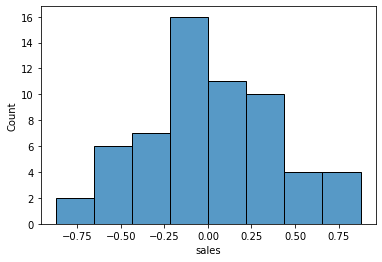

In [59]:
sns.histplot(residuals)
plt.show()

In [60]:
residuals.skew()

0.07135639672976499

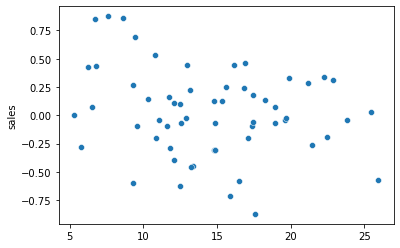

In [61]:
# check linear relation or not
sns.scatterplot(Y_pred,residuals)
plt.show()